In [1]:
# Import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
sns.set_style("dark")
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings('ignore')


In [2]:
# Import stroke dataset

data = pd.read_csv('healthcare-dataset-stroke-data.csv')
print(data.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [3]:
# Convert to pandas dataframe

df = pd.DataFrame(data)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Let's examine the shape of object types of our data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# Let's display summary statistics for the dataframe

df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
# What type of data types are we dealing with?

df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
# Let's see if and where any null values are located

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing}%')


id - 0.0%
gender - 0.0%
age - 0.0%
hypertension - 0.0%
heart_disease - 0.0%
ever_married - 0.0%
work_type - 0.0%
Residence_type - 0.0%
avg_glucose_level - 0.0%
bmi - 0.03933463796477495%
smoking_status - 0.0%
stroke - 0.0%


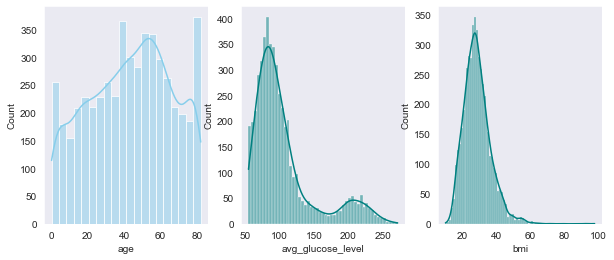

In [8]:
# Let's examine the distribution of the features with continuous/discreet datatypes using a histogram

fig, axs = plt.subplots(1,3, figsize=(10, 4))

sns.histplot(data=df, x="age", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df, x="avg_glucose_level", kde=True, color="teal", ax=axs[1])
sns.histplot(data=df, x="bmi", kde=True, color="teal", ax=axs[2])

plt.show()

In [9]:
# We can see that the distribution is right skewed for glucose level and bmi.
# Thus the median is better to use for filling in na values as he median is more resistant to outliers than the mean.


In [10]:
# impute na values in bmi column with median values

missing_col = ['bmi']

for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].median()

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing}%')

id - 0.0%
gender - 0.0%
age - 0.0%
hypertension - 0.0%
heart_disease - 0.0%
ever_married - 0.0%
work_type - 0.0%
Residence_type - 0.0%
avg_glucose_level - 0.0%
bmi - 0.0%
smoking_status - 0.0%
stroke - 0.0%


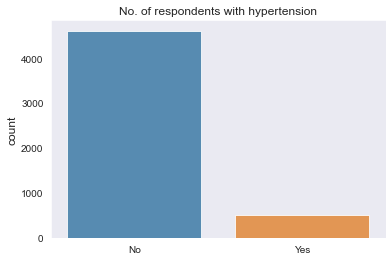

In [11]:
# Creating a barplot for no. with hypertension

ht = df["hypertension"].value_counts()

plt.figure()
g = sns.barplot(ht.index, ht.values, alpha=0.8)
plt.title('No. of respondents with hypertension')
plt.ylabel('count', fontsize=12)
g.set_xticklabels(['No', 'Yes'])
plt.show()


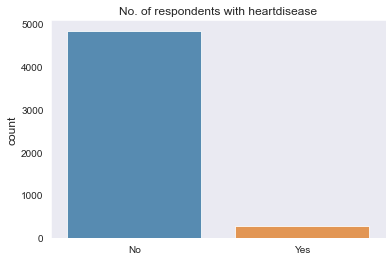

In [12]:
# Creating a barplot for no. with heartdisease

hd = df["heart_disease"].value_counts()

plt.figure()
g = sns.barplot(hd.index, hd.values, alpha=0.8)
plt.title('No. of respondents with heartdisease')
plt.ylabel('count', fontsize=12)
g.set_xticklabels(['No', 'Yes'])
plt.show()


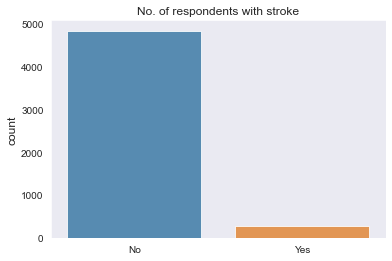

In [13]:
# Creating a barplot for no. with stroke

s = df["heart_disease"].value_counts()

plt.figure()
g = sns.barplot(s.index, s.values, alpha=0.8)
plt.title('No. of respondents with stroke')
plt.ylabel('count', fontsize=12)
g.set_xticklabels(['No', 'Yes'])
plt.show()


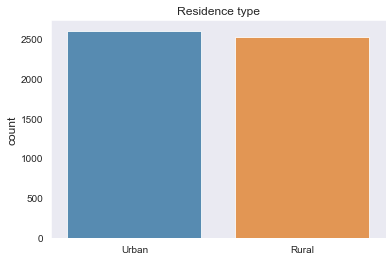

In [14]:
rt = df["Residence_type"].value_counts()

plt.figure()
g = sns.barplot(rt.index, rt.values, alpha=0.8)
plt.title('Residence type')
plt.ylabel('count', fontsize=12)
plt.show()


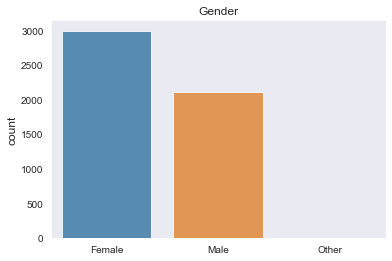

In [15]:
gen = df["gender"].value_counts()

plt.figure()
g = sns.barplot(gen.index, gen.values, alpha=0.8)
plt.title('Gender')
plt.ylabel('count', fontsize=12)
plt.show()

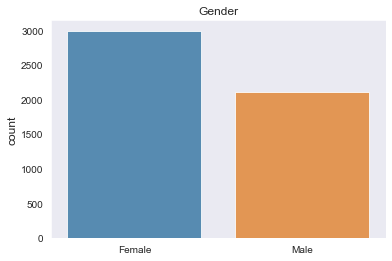

In [16]:
# remove 'other' value from gender column as there is only one row with this category
df = df[~df.gender.str.contains("Other")]

gen = df["gender"].value_counts()
plt.figure()
g = sns.barplot(gen.index, gen.values, alpha=0.8)
plt.title('Gender')
plt.ylabel('count', fontsize=12)
plt.show()


In [17]:
# Several variables are not numeric but we can turn these variables into factor variable.

df_numerized = df

for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
        
df_numerized

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


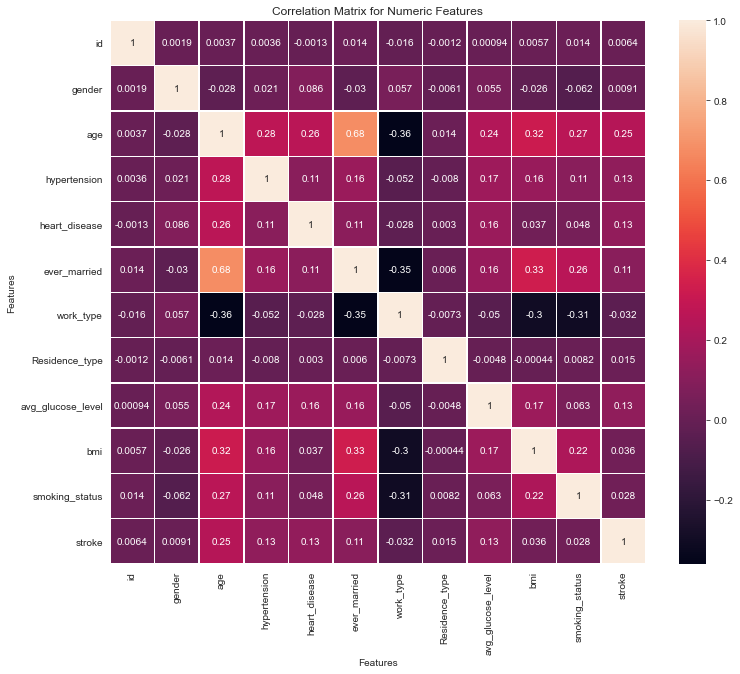

In [18]:
# Lets explore correlations between variables using heatmap

correlation_matrix = df_numerized.corr()

fig, ax = plt.subplots(figsize=(12,10))         # Sample figsize in inches
sns.heatmap(correlation_matrix, annot = True, linewidths=.5, ax=ax)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()


In [19]:
# Let's find out in descending order, which features are most strongly correlated with the Y (stroke dv)

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()['stroke']
pd.set_option('display.max_rows', None)
corr_pairs.sort_values(ascending=False)

stroke               1.000000
age                  0.245239
heart_disease        0.134905
avg_glucose_level    0.131991
hypertension         0.127891
ever_married         0.108299
bmi                  0.036075
smoking_status       0.028108
Residence_type       0.015415
gender               0.009081
id                   0.006430
work_type           -0.032323
dtype: float64

In [20]:
# Age, heart disease, avg_glucose_level, hypertension, and ever married are correlated with the dv.

In [21]:
r_age, p_age = scipy.stats.pearsonr(df_numerized['age'], df_numerized['stroke'])

print(f'The pearsons coefficient is: \n {r_age}', '\n',
      '\n', f'The p-value is: \n {p_age}')

# There is a weak statistically significant correlation between age and having stroke

The pearsons coefficient is: 
 0.24523875623198063 
 
 The p-value is: 
 7.435468822732509e-71


In [22]:
r_hd, p_hd = scipy.stats.pearsonr(df_numerized['heart_disease'], df_numerized['stroke'])

print(f'The pearsons coefficient is: \n {r_hd}', '\n',
      '\n', f'The p-value is: \n {p_hd}')

# There is a weak statistically significant correlation between having heart disease and having a stroke

The pearsons coefficient is: 
 0.13490484180042575 
 
 The p-value is: 
 3.506802133190922e-22


In [23]:
r_gl, p_gl = scipy.stats.pearsonr(df_numerized['avg_glucose_level'], df_numerized['stroke'])

print(f'The pearsons coefficient is: \n {r_gl}', '\n',
      '\n', f'The p-value is: \n {p_gl}')

# There is a weak statistically significant correlation between having a high glucose level and having a stroke

The pearsons coefficient is: 
 0.13199119156645794 
 
 The p-value is: 
 2.705302697194147e-21


In [24]:
r_hpt, p_hpt = scipy.stats.pearsonr(df_numerized['hypertension'], df_numerized['stroke'])

print(f'The pearsons coefficient is: \n {r_hpt}', '\n',
      '\n', f'The p-value is: \n {p_hpt}')

# There is a weak statistically significant correlation between having a hypertension and having a stroke

The pearsons coefficient is: 
 0.127891259129187 
 
 The p-value is: 
 4.441472568436832e-20


In [25]:
r_married, p_married = scipy.stats.pearsonr(df_numerized['ever_married'], df_numerized['stroke'])

print(f'The pearsons coefficient is: \n {r_married}', '\n',
      '\n', f'The p-value is: \n {p_married}')

# There is a weak statistically significant correlation between being married and having a stroke

The pearsons coefficient is: 
 0.10829931566075378 
 
 The p-value is: 
 8.367746992238451e-15


In [26]:
# Now let create a LR model using sklearn

X = df_numerized[['age', 'heart_disease', 'avg_glucose_level', 'hypertension','ever_married']]
y = df_numerized[['stroke']]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state =7)

In [28]:
# Fit model on 30% of test data
# N.B. As the y labels were in a column format, I had to use the ravel() function.

model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)

print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9471624266144814
[[1452    0]
 [  81    0]]


In [29]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1452
           1       0.00      0.00      0.00        81

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



<AxesSubplot:>

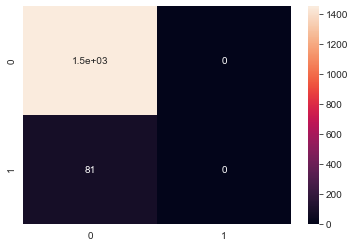

In [30]:
cf_matrix = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(cf_matrix, annot=True)



<AxesSubplot:>

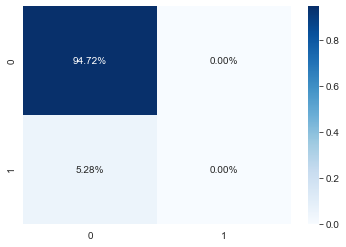

In [31]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

# The model correctively predicted the y values 95% of the time.

<AxesSubplot:>

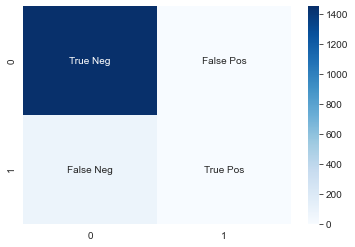

In [32]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [33]:
# I applied a neat function thanks to Dennis T (see his/her Github for more)
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea 
# https://github.com/DTrimarchi10/confusion_matrix 

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)


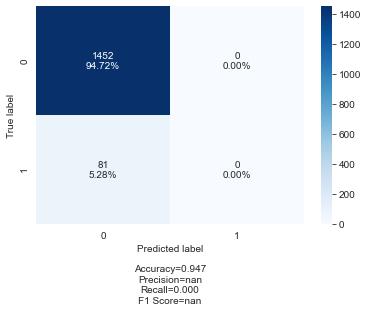

In [34]:
make_confusion_matrix(cf_matrix)

In [35]:
#As my father has been recommended anticoagulants by the NHS due to suffering from hypertension, I added his data and tested
# it on the model. My father is aged 75, he does not suffer from heart disease, has an average glucose level reading, 
# suffers from hypertension and is married.

new_row = np.array([75,0,106.39,1,1])
print(new_row)
new_row = new_row.reshape(1, -1)
y_predict2 = model.predict(new_row)
print(y_predict2)

[ 75.     0.   106.39   1.     1.  ]
[0]


In [36]:
# According to the model, my father has a 20% chance of a stroke. The NHS predicts a +40% chance of stroke. I expect this is because
# other risk factors/features are taken into account such as blood pressure, weight, and the fact that my father suffers from a
# rare syndrome called PXE increases the risk of stroke. The model I used is fairly basic with only 5 features fed into the model. 

model.predict_proba(new_row)

array([[0.80601408, 0.19398592]])

In [37]:
# Now let's calculate the stroke probability for the rest of the datset.

df_numerized['prob_stroke'] = model.predict_proba(df_numerized[X_train.columns])[:,1]
df_numerized[['id', 'stroke', 'prob_stroke']].sort_values(by=['prob_stroke'], ascending=False).head(10)

,id,stroke,prob_stroke
220,20463,1,0.453558
187,67895,1,0.433978
3318,65955,0,0.433249
3882,63836,0,0.418542
1412,62452,0,0.401487
4164,40163,0,0.396552
894,25627,0,0.388377
76,36236,1,0.380499
1737,54353,0,0.376552
4515,31426,0,0.372967
